## Creating Teoplitz and Circulant matrices

A Toeplitz matrix is a special type of matrix in which each descending diagonal from left to right is constant. In other words, the elements on any diagonal of a Toeplitz matrix are constant. The general form of a Toeplitz matrix is given by:

$\begin{bmatrix} a_0 & a_{-1} & a_{-2} & \ldots & a_{-(n-1)} \\
a_1 & a_0 & a_{-1} & \ldots & a_{-(n-2)} \\
a_2 & a_1 & a_0 & \ldots & a_{-(n-3)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
a_{n-1} & a_{n-2} & a_{n-3} & \ldots & a_0
\end{bmatrix} $

Each row of a Toeplitz matrix is a right shift of the previous row, and each column is a down shift of the previous column.
Toeplitz matrices appear in various applications, including signal processing, numerical analysis, and linear algebra.

**Circulant Matrix:**
A circulant matrix is a special kind of Toeplitz matrix where each row is a circular shift of the previous row. The general form of a circulant matrix is given by:
$ C = \begin{bmatrix}
c_0 & c_{n-1} & c_{n-2} & \ldots & c_1 \\
c_1 & c_0 & c_{n-1} & \ldots & c_2 \\
c_2 & c_1 & c_0 & \ldots & c_3 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
c_{n-1} & c_{n-2} & c_{n-3} & \ldots & c_0
\end{bmatrix} $

In a circulant matrix, each row is a circular shift (rotation) of the row above it. Circulant matrices have interesting properties, and they arise in various mathematical contexts, including signal processing, algebraic number theory, and polynomial interpolation.
Both Toeplitz and circulant matrices are special cases of more general structured matrices and have applications in fields such as signal processing, linear systems, and numerical analysis.

In [1]:
from scipy.linalg import toeplitz, circulant

toeplitz([1,2,3], [1,2,5,6])

circulant([1, 5, 3])

array([[1, 3, 5],
       [5, 1, 3],
       [3, 5, 1]])

## The Fast Fourier Transform (FFT)

Module `numpy.fft`

The Fast Fourier Transform (FFT) is an efficient algorithm for computing the Discrete Fourier Transform (DFT) and its inverse. The DFT is a mathematical transformation that decomposes a function of time (or space) into its constituent frequencies. The FFT algorithm significantly reduces the computational complexity of performing the DFT, making it more practical for real-world applications.

In signal processing and many other fields, the FFT is widely used for tasks such as filtering, convolution, and spectral analysis.

### 1D FFT

Operates on one-dimensional data, such as a time-series signal or a single column (or row) of a matrix.
Produces a one-dimensional array of complex numbers representing the frequency components of the input signal.

We consider the signal 

$f(t) = \sin(h_1 (2 \pi t)) + \frac{1}{2}\sin(h_2 (2 \pi t))$ 

with $h_1 = 5$ Hz and $h_2 = 13.5$ Hz.

We sample it with spacing $\Delta t = 0.01$ s. This corresponds to a sampling rate of 100 Hz.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'f(t)')

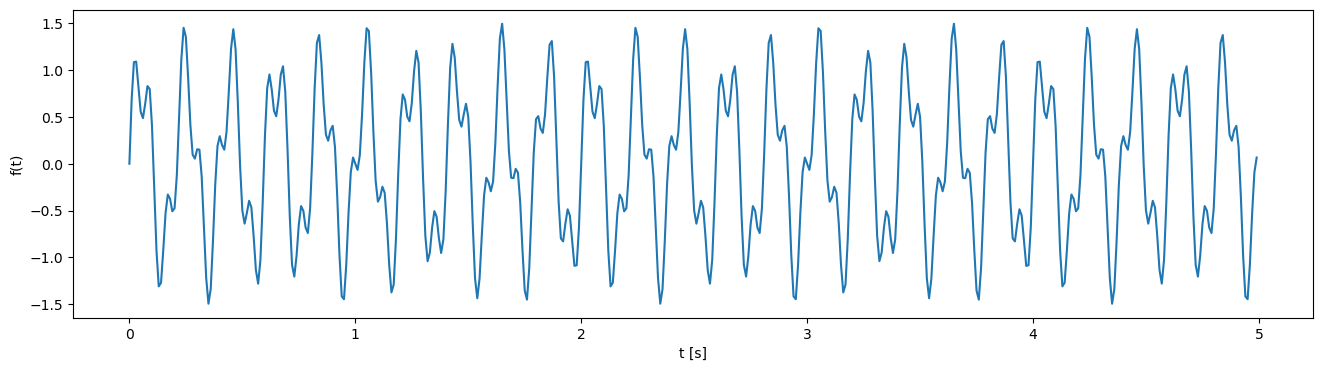

In [3]:
dt = 1e-2 # [s]
t = np.arange(0, 5, dt) #Time period of analysis
f = np.sin(5*2*np.pi*t) + .5*np.sin(13.5*2*np.pi*t)

plt.subplots(1,1,figsize = (16,4))
plt.plot(t, f)
plt.xlabel('t [s]')
plt.ylabel('f(t)')

We compute the DFT (Discrete Fourier Transform) by the FFT algorithm

In [4]:
F = np.fft.fft(f)
freq = np.fft.fftfreq(len(t), d = dt) #It takes two arguments: the length of the input signal (len(t)) and the sampling interval (dt). 
                            #The resulting freq array contains the frequencies corresponding to each element in the FFT result F


We reorder the frequencies and we plot the FFT output.

Text(0.5, 0, 'frequency [Hz]')

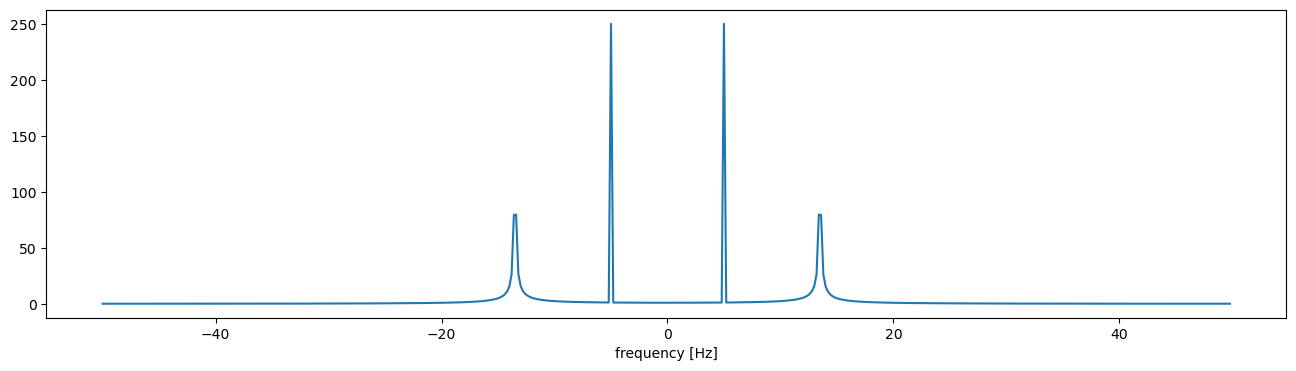

In [6]:
F_shift = np.fft.fftshift(F)
freq_shift = np.fft.fftshift(freq)

plt.subplots(1,1,figsize = (16,4))
plt.plot(freq_shift, np.absolute(F_shift))
plt.xlabel('frequency [Hz]')

We reconstruct the original signal

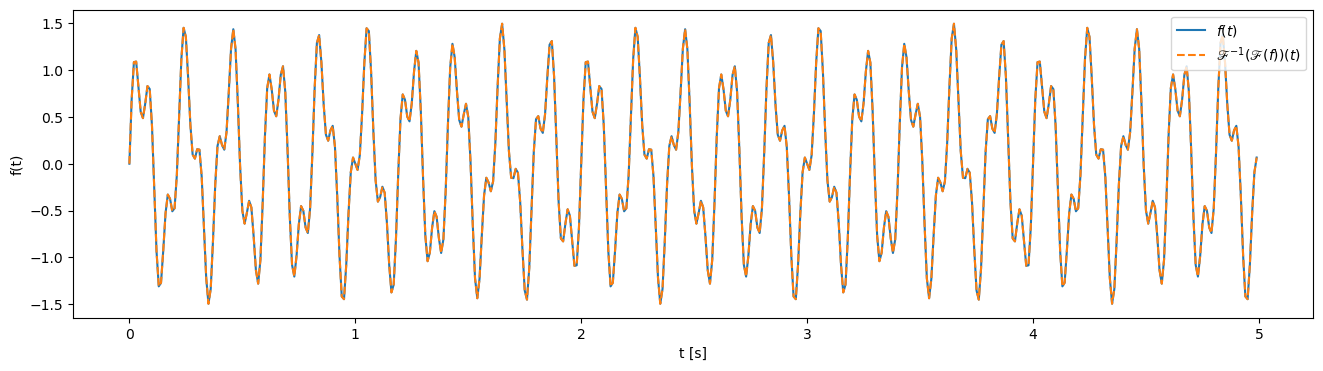

In [7]:
f_reconstructed = np.fft.ifft(F)

f_reconstructed_real = np.real(f_reconstructed)

plt.subplots(1,1,figsize = (16,4))
plt.plot(t, f, label = '$f(t)$')
plt.plot(t, f_reconstructed_real, '--', label = '$\mathscr{F}^{-1}(\mathscr{F}(f))(t)$')
plt.xlabel('t [s]')
plt.ylabel('f(t)')
plt.legend()

### 2D FFT

Operates on two-dimensional data, such as images or matrices. It transforms both rows and columns of the input matrix.

Produces a two-dimensional array of complex numbers representing the frequency components of the input image. The output is a complex matrix.

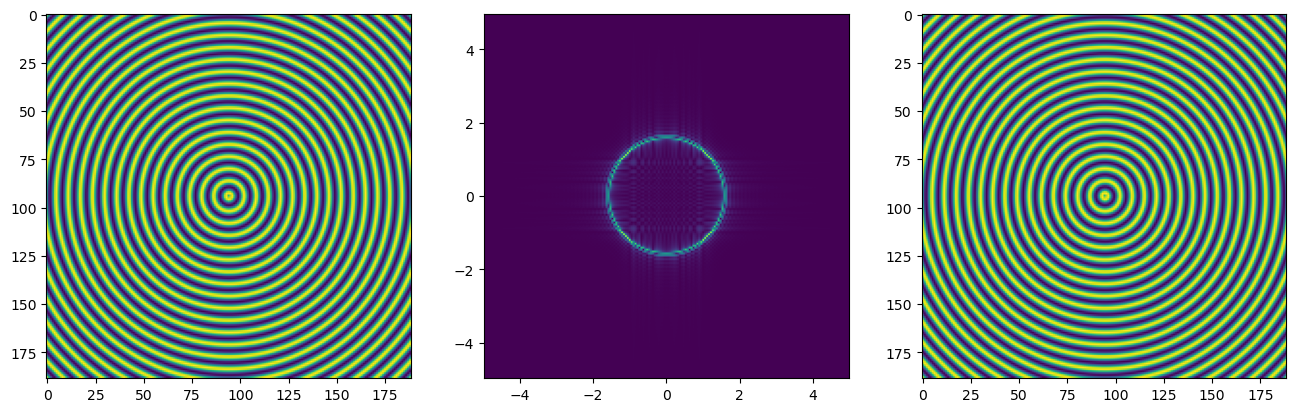

In [15]:
# create a 2D signal
x = np.arange(-3*np.pi, 3*np.pi, 0.1)
y = np.arange(-3*np.pi, 3*np.pi, 0.1)
xx, yy = np.meshgrid(x, y)
#z = np.sin(2*np.pi*1*xx) + np.sin(2*np.pi*2*yy)
z = np.sin(10*np.sqrt(xx**2 + yy**2))

# FFT
Z = np.fft.fft2(z)
Z_shift = np.fft.fftshift(Z) #shift the zero-frequency component to the center of the array

freq_x_shift = np.fft.fftshift(np.fft.fftfreq(len(x), d = 0.1))
freq_y_shift = np.fft.fftshift(np.fft.fftfreq(len(y), d = 0.1))
limits = [freq_x_shift[0], freq_x_shift[-1], freq_y_shift[0], freq_y_shift[-1]]

# iFFT
z_reconstructed = np.fft.ifft2(Z)

# plotting
fig, axs = plt.subplots(1,3,figsize = (16,8))
axs[0].imshow(z)
axs[1].imshow(np.absolute(Z_shift), extent=limits)
axs[2].imshow(np.real(z_reconstructed))